In [14]:
import gymnasium as gym
import numpy as np
import jax
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
# from stable_baselines3 import DDPG
from sbx import DQN
import pde_opt
from pde_opt.numerics.domains import Domain


In [2]:
ref = np.load("reference.npy")

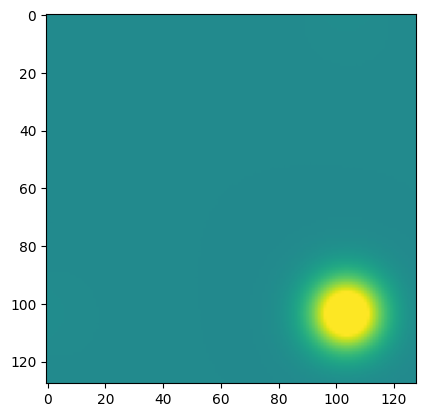

In [24]:
plt.imshow(ref, vmin=0.0, vmax=1.0)

In [3]:
def reset_func(domain, seed=0):
    return 0.5 * jnp.ones(domain.points) + 0.01 * random.normal(random.PRNGKey(seed), domain.points)

In [4]:
Nx, Ny = 128, 128
Lx = 0.01 * Nx
Ly = 0.01 * Ny
domain = Domain((Nx, Ny), ((-Lx / 2, Lx / 2), (-Ly / 2, Ly / 2)), "dimensionless")

In [5]:
params = {
    "reset_func": reset_func,
    "diffusion_coefficient": 0.1,
    "max_control_step": 0.1,
    "end_time": 1.0,
    "step_dt": 0.05,
    "numeric_dt": 0.0001,
    "domain": domain,
    "field_dim": 1,
    "reward_function": lambda x: 1.0 / np.linalg.norm(x - ref),
    "discrete_action_space": True
}

In [6]:
env = gym.make('AdvectionDiffusion-v0', **params)

In [7]:
model = DQN("CnnPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
model.learn(total_timesteps=75, progress_bar=True)

Output()

In [22]:
jax.clear_caches()

In [16]:
obs, info = env.reset()
observations = []
for i in range(50):
    print(f"i: {i}", end=", ")
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(int(action))
    observations.append(obs)

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


In [18]:
from IPython.display import HTML
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(4,4))

ims = []
for i in range(0, len(observations), 2):
    im = ax.imshow(observations[i][0], animated=True, 
                   vmin=0.0, vmax=255,
                   extent=[domain.box[0][0], domain.box[0][1], 
                          domain.box[1][0], domain.box[1][1]])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

plt.title('Cahn-Hilliard Evolution')
plt.xlabel('x')
plt.ylabel('y')

plt.close()

HTML(ani.to_jshtml())